In [ ]:
pip install tflite-support-nightly

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 208 kB 46.3 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0


In [ ]:
from tflite_support.metadata_writers import image_segmenter
from tflite_support.metadata_writers import writer_utils


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
# from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

In [ ]:
!curl -L https://github.com/tensorflow/tflite-support/raw/master/tensorflow_lite_support/metadata/python/tests/testdata/image_segmenter/deeplabv3.tflite -o deeplabv3.tflite
!curl -L https://github.com/tensorflow/tflite-support/raw/master/tensorflow_lite_support/metadata/python/tests/testdata/image_segmenter/labelmap.txt -o deeplabv3_labels.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   220  100   220    0     0    409      0 --:--:-- --:--:-- --:--:--   408
100 2714k  100 2714k    0     0  2749k      0 --:--:-- --:--:-- --:--:-- 2749k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   216  100   216    0     0   1411      0 --:--:-- --:--:-- --:--:--  1402
100   141  100   141    0     0    444      0 --:--:-- --:--:-- --:--:--   444


In [ ]:
ImageSegmenterWriter = image_segmenter.MetadataWriter
_MODEL_PATH = "deeplabv3.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "deeplabv3_labels.txt"
_SAVE_TO_PATH = "deeplabv3_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageSegmenterWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageSegmenter",
  "description": "Semantic image segmentation predicts whether each pixel of an image is associated with a certain class.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be segmented.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
  

In [ ]:
# Load TFLite model and see some details about input/output
TFLITE_MODEL = "/content/deeplabv3.tflite"
tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])
print(input_details[0])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])
print(output_details[0])

== Input details ==
name: sub_7
shape: [  1 257 257   3]
type: <class 'numpy.float32'>
{'name': 'sub_7', 'index': 183, 'shape': array([  1, 257, 257,   3], dtype=int32), 'shape_signature': array([  1, 257, 257,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}

== Output details ==
name: ResizeBilinear_3
shape: [  1 257 257  21]
type: <class 'numpy.float32'>
{'name': 'ResizeBilinear_3', 'index': 168, 'shape': array([  1, 257, 257,  21], dtype=int32), 'shape_signature': array([  1, 257, 257,  21], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2005k  100 2005k    0     0  4043k      0 --:--:-- --:--:-- --:--:-- 4035k


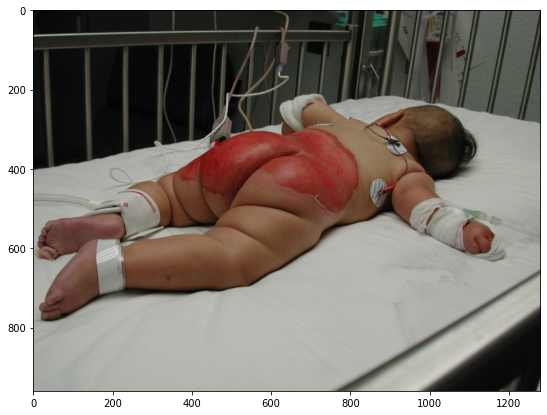

In [ ]:
#@title Choose image { run: "auto", form-width: "60%", display-mode: "both" }
img_url = "https://cdn.discordapp.com/attachments/903287121559814229/906976639546695700/GetAttachmentThumbnail.png" #@param ["https://cdn.discordapp.com/attachments/903287121559814229/906976639546695700/GetAttachmentThumbnail.png", "https://www.vicburns.org.au/wp-content/uploads/2016/11/HD-2-27-Nov-08.jpg", "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3VBZN2iyxUMiCb0L75Isf34CY2FYBLcSwgA&usqp=CAU", "https://raw.githubusercontent.com/VikramShenoy97/Human-Segmentation-Dataset/master/Training_Images/87.jpg"] {allow-input: true}

!curl -o /content/img {img_url}

test_img = cv2.cvtColor(cv2.imread('/content/img'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 7))
plt.imshow(test_img);

In [ ]:
import cv2
import matplotlib.pyplot as plt
  
# Load TFLite model and see some details about input/output
TFLITE_MODEL = "/content/deeplabv3.tflite"
tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

def resize(img):
    return cv2.resize(img, tuple([257, 257]))

def normalize_and_batch(img):
    img =  (np.expand_dims(img, axis=0).astype('float32') - 127.5) / 127.5
    return img

def create_segmentation(img, model, display_segmentation=True):
    """ Get segmentation from model
    NOTE: In this case, our model is the interpreter
    """
    # Resize and store to apply mask later
    img_resize = resize(img)

    # Process img for model input
    img_batched = normalize_and_batch(img_resize)

    # Perform inference
    model.allocate_tensors()
    model.set_tensor(input_details[0]['index'], img_batched)
    model.invoke()
    output_data = model.get_tensor(output_details[0]['index'])

    # Select human segmentation filter
    # set label for each pixel, the index of the max value across the "label" axis
    mSegmentBits = np.argmax(output_data, axis=-1)[0]

    # set only the "human" label (output channel 15) equal to 1
    outputbitmap = np.where(mSegmentBits == 15, 1, 0).astype(np.float32)

    h, w = img.shape[:2]
    outputbitmap = cv2.resize(outputbitmap[:,:,np.newaxis], (w, h)).astype(np.int8)

    segmentation = outputbitmap[:,:,np.newaxis] * img

    
    if display_segmentation:
        plt.figure(figsize=(10, 7))
        plt.imshow(segmentation);

    return segmentation

True

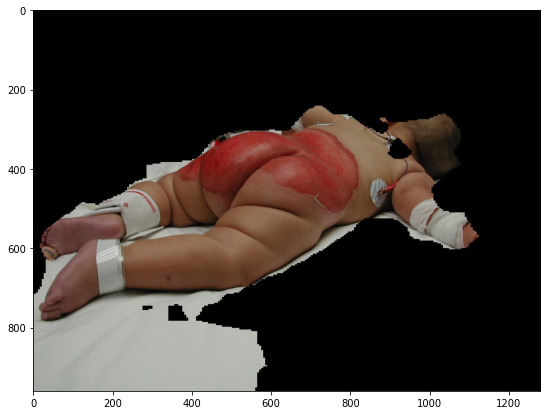

In [ ]:
segmentation = create_segmentation(test_img, tflite_interpreter)
cv2.imwrite("segmentation.jpg", segmentation)